In [ ]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10

In [ ]:
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

60000 resim, 32x32 boyut, 3 renk kanalı

In [ ]:
X_train[55]

array([[[156, 194, 129],
        [167, 212, 127],
        [169, 215, 129],
        ...,
        [243, 247, 226],
        [230, 235, 206],
        [208, 215, 180]],

       [[174, 210, 147],
        [192, 229, 159],
        [172, 204, 163],
        ...,
        [237, 243, 223],
        [213, 221, 200],
        [186, 193, 169]],

       [[192, 234, 145],
        [194, 230, 178],
        [174, 201, 194],
        ...,
        [226, 231, 218],
        [198, 208, 186],
        [195, 200, 165]],

       ...,

       [[187, 211, 151],
        [211, 234, 180],
        [231, 244, 221],
        ...,
        [210, 204, 199],
        [217, 208, 210],
        [203, 192, 192]],

       [[231, 238, 218],
        [220, 236, 209],
        [200, 219, 177],
        ...,
        [183, 170, 153],
        [189, 175, 160],
        [186, 169, 153]],

       [[238, 242, 224],
        [238, 247, 232],
        [229, 239, 217],
        ...,
        [141, 126, 106],
        [151, 137, 117],
        [157, 141, 118]]

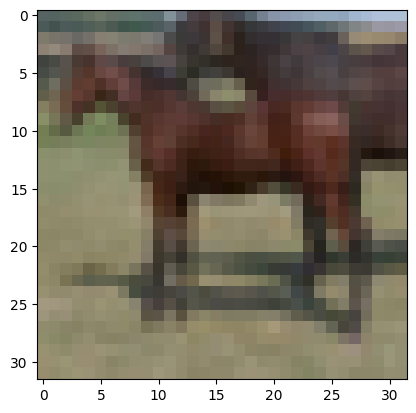

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[595])

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
import numpy as np

np.isnan(X_train).any(),np.isnan(X_test).any()

(False, False)

# Preprocessing

In [ ]:
#Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder(sparse = False)
y_train = one_hot_encoder.fit_transform(y_train)
y_test = one_hot_encoder.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(y_train[2225])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
print(y_test[90])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 10)

# CNN (Convolutional Neural Networks)

In [ ]:
batch_size = 32 #50000 veri 32,32,32,32 -> batch_size 50000/32 = 1563 tane 32 li paket oluşturuyor
num_classess = len(classes)
epoch = 55 # ağırlık güncellemesi yapıyor 50 tane
input_size = (32,32,3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape = input_size, activation = "relu"),
    tf.keras.layers.Conv2D(32, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3,padding="same" , activation = "relu"),
    tf.keras.layers.Conv2D(64, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3,padding="same", activation = "relu"),
    tf.keras.layers.Conv2D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classess,activation="softmax"),
])

In [ ]:
model.compile(optimizer = "adam", loss = "CategoricalCrossentropy",metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,batch_size = batch_size, epochs= epoch)

Epoch 1/55
1563/1563 [==============================] - 27s 7ms/step - loss: 1.7575 - accuracy: 0.3307
Epoch 2/55
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2832 - accuracy: 0.5395
Epoch 3/55
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0997 - accuracy: 0.6128
Epoch 4/55
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9930 - accuracy: 0.6530
Epoch 5/55
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9222 - accuracy: 0.6785
Epoch 6/55
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8677 - accuracy: 0.6994
Epoch 7/55
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8364 - accuracy: 0.7113
Epoch 8/55
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8037 - accuracy: 0.7245
Epoch 9/55
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7793 - accuracy: 0.7313
Epoch 10/55
1563/1563 [==============================] - 10s 6ms/step - l

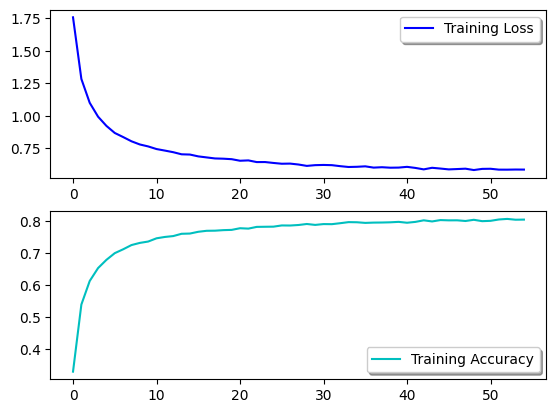

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='blue', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='c', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.7965


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

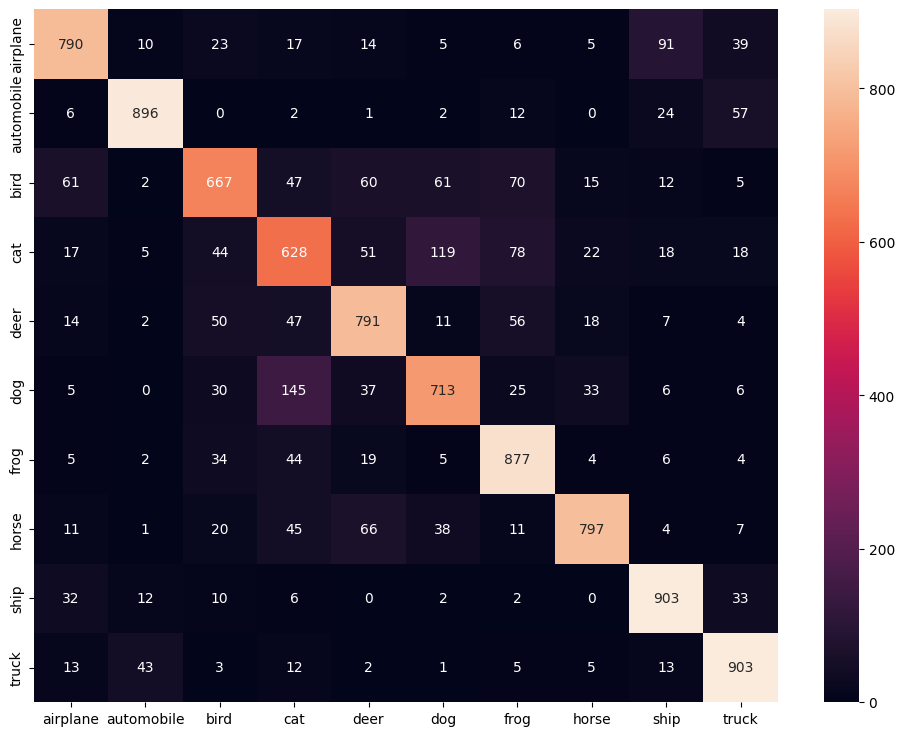

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)